In [1]:
import os
os.chdir('/Users/lphan/Documents/Spotify')

In [1]:
# Packages
# For Cleaning and basic functions
import pandas as pd
import numpy as np
import requests
import json

# # Connecting to Spotify API
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials

# For Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#pip install matplotlib
#pip install -U scikit-learn

In [257]:
mood = "https://raw.githubusercontent.com/lphan1812/spotify-project/main/mood_data.csv"
user_six_mos = 'https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_six_months.csv'
user_audiofeature = 'https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_audio_features.csv'

In [288]:
user_genres = "https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_6mo_genres.csv"
user_genres = pd.read_csv(user_genres)
user_genres = user_genres[~(user_genres['genres'] == 'singer-songwriter')]

In [258]:
mood_data = pd.read_csv(mood)
user_six_mos = pd.read_csv(user_six_mos)
user_audiofeature = pd.read_csv(user_audiofeature)

In [260]:

# Drops NAs so it can be put into the sklearn model
train_data = mood_data.dropna()
user_data = user_audiofeature.dropna()

In [261]:
user_audiofeature

,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo
0,4FFSK1xgCLkTZJLUERLZKG,61,0.712,0.440,-11.566,0.312,0.0413,0.000000,123.958
1,5enxwA8aAbwZbf5qCHORXi,85,0.631,0.518,-8.771,0.205,0.0303,0.000000,93.023
2,0T482F5L30d7ChNbLqsKa7,43,0.414,0.235,-15.252,0.137,0.0429,0.907000,144.467
3,3EZTyh1wJEmreJH1aULPCj,62,0.323,0.106,-10.374,0.158,0.0323,0.000059,91.455
4,5Mw9bXG1dLNhbjofkVS2oR,69,0.262,0.361,-10.187,0.056,0.0333,0.002680,126.786
...,...,...,...,...,...,...,...,...,...
831,2cOUlop2ZakjOKe4WinesN,77,0.735,0.425,-6.648,0.848,0.0464,0.000000,85.896
832,0k6LV1ohcK2hlNPwu1nVw9,63,0.641,0.512,-4.935,0.395,0.0285,0.000000,116.059
833,6yhLR2sVn1IfsScVrR4ocr,60,0.416,0.341,-10.749,0.776,0.0391,0.000000,177.229
834,4pbG9SUmWIvsROVLF0zF9s,74,0.490,0.715,-5.549,0.866,0.0476,0.000000,130.726


In [262]:
user_data

,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo
0,4FFSK1xgCLkTZJLUERLZKG,61,0.712,0.440,-11.566,0.312,0.0413,0.000000,123.958
1,5enxwA8aAbwZbf5qCHORXi,85,0.631,0.518,-8.771,0.205,0.0303,0.000000,93.023
2,0T482F5L30d7ChNbLqsKa7,43,0.414,0.235,-15.252,0.137,0.0429,0.907000,144.467
3,3EZTyh1wJEmreJH1aULPCj,62,0.323,0.106,-10.374,0.158,0.0323,0.000059,91.455
4,5Mw9bXG1dLNhbjofkVS2oR,69,0.262,0.361,-10.187,0.056,0.0333,0.002680,126.786
...,...,...,...,...,...,...,...,...,...
831,2cOUlop2ZakjOKe4WinesN,77,0.735,0.425,-6.648,0.848,0.0464,0.000000,85.896
832,0k6LV1ohcK2hlNPwu1nVw9,63,0.641,0.512,-4.935,0.395,0.0285,0.000000,116.059
833,6yhLR2sVn1IfsScVrR4ocr,60,0.416,0.341,-10.749,0.776,0.0391,0.000000,177.229
834,4pbG9SUmWIvsROVLF0zF9s,74,0.490,0.715,-5.549,0.866,0.0476,0.000000,130.726


In [263]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import preprocessing


# subset the relevant columns
mood_features = mood_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]
user_features = user_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]

# scale audio features to standardize the metrics
scaler = preprocessing.MinMaxScaler()
mood_features_scaled = pd.DataFrame(scaler.fit_transform(mood_features), columns=mood_features.columns)
user_features_scaled = pd.DataFrame(scaler.fit_transform(user_features), columns=user_features.columns)

mood_target = mood_data['vibe']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a logistic regression model and train it
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
logreg.fit(X_train, y_train)

# make predictions on the user data
user_pred = logreg.predict(user_features_scaled)

# calculate the accuracy of the model on the test set
y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is:", accuracy)


The accuracy of the model is: 0.7230215827338129


In [264]:
print("The accuracy of the model is:", accuracy)

total = len(user_pred)
upbeat_count = np.count_nonzero(user_pred == 'upbeat')
upbeat_per = round((upbeat_count / total) * 100)

sad_count = np.count_nonzero(user_pred == 'sad')
sad_per = round((sad_count / total) * 100)

chill_count = np.count_nonzero(user_pred == 'chill')
chill_per = round((chill_count / total) * 100)

print("Upbeat percent:", upbeat_per, "%")
print("Sad percent:", sad_per , "%")
print("Chill percent:", chill_per, "%")

The accuracy of the model is: 0.7230215827338129
Upbeat percent: 26 %
Sad percent: 28 %
Chill percent: 46 %


In [278]:
from PIL import Image
import requests
from io import BytesIO

# Define image URLs
upbeat_image_url = 'https://github.com/lphan1812/spotify-project/blob/main/upbeat_img.jpg?raw=true'
sad_image_url = 'https://github.com/lphan1812/spotify-project/blob/main/sad_img.jpg?raw=true'
chill_image_url = 'https://github.com/lphan1812/spotify-project/blob/main/chill_img.jpg?raw=true'
confused_url = 'https://github.com/lphan1812/spotify-project/blob/main/confused_cat.png?raw=true'

# Read images from URLs
response = requests.get(upbeat_image_url)
upbeat_image = Image.open(BytesIO(response.content))

response = requests.get(sad_image_url)
sad_image = Image.open(BytesIO(response.content))

response = requests.get(chill_image_url)
chill_image = Image.open(BytesIO(response.content))

response = requests.get(confused_url)
confused_image = Image.open(BytesIO(response.content))

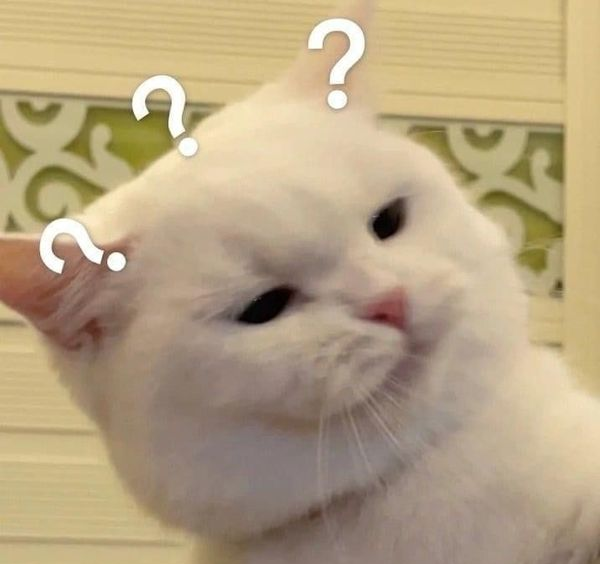

In [279]:
confused_image

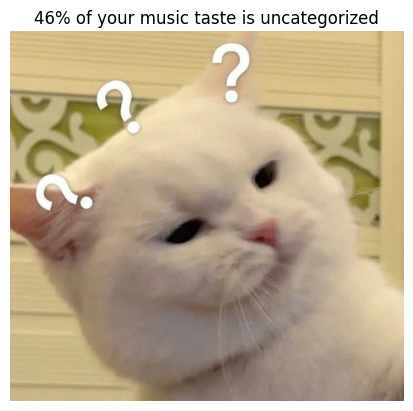

In [280]:
# Find the highest percentage
max_percent = max(upbeat_per, sad_per, chill_per)

style = {'font-family': 'Andale Mono','font-size': '10px'}
# Find the highest percentage category
max_per = max(upbeat_per, sad_per, chill_per)
if (upbeat_per < 50 and sad_per <50 and chill_per < 50): 
    image_file = confused_image
    category = 'uncategorized'
    punchline = pn.pane.Markdown("# Jeez.. your moods are all over the place. Happy, Chill, Emo. Whatever. Just pick one!",style=style)
elif max_per == upbeat_per:
    image_file = upbeat_image
    category = 'upbeat'
    punchline = pn.pane.Markdown("# Congratulations, you're not depressed!!!",style=style)
elif max_per == sad_per:
    image_file = sad_image
    category = 'sad'
    punchline = pn.pane.Markdown("# LMAO who hurt you?",style=style)
else:
    image_file = chill_image
    category = 'chill'
    punchline = pn.pane.Markdown("# Ah yes, the classic 'I'm so cool, I only listen to lo-fi beats vibe.' It's okay. Same here. We're chillin",style=style)

# Load and display the image
# image = plt.imread(image_file, format = None)
plt.imshow(image_file)
plt.axis('off')
plt.title(f"{max_per}% of your music taste is {category}")
plt.show()


In [266]:
punchline

Markdown(str, sizing_mode='stretch_width', style={'font-family': 'Andale Mo...})

In [267]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
import plotly.graph_objs as go

In [268]:
music_feature_me

,danceability,energy,loudness,speechiness,valence,tempo,popularity
0,0.703940,0.681887,0.843341,0.070156,0.649215,0.468697,1.000000
1,0.807396,0.807326,0.822766,0.024081,0.812565,0.404957,0.969072
2,0.543253,0.966884,0.858567,0.017980,0.291099,0.526881,0.958763
3,0.532247,0.550426,0.819659,0.008830,0.330890,0.371296,0.948454
4,0.700638,0.798294,0.805927,0.039172,0.836649,0.596150,0.948454
...,...,...,...,...,...,...,...
3490,0.556460,0.950828,0.835587,0.018623,0.638743,0.335398,0.525773
3491,0.542153,0.983944,0.861907,0.195698,0.276440,0.436995,0.546392
3492,0.350649,0.997993,0.875219,0.083962,0.169634,0.541559,0.639175
3493,0.340744,0.978926,0.815876,0.089420,0.230366,0.636996,0.505155


In [269]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas
# df = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")
# cache data to improve dashboard performance

In [270]:
import panel as pn
import numpy as np
import holoviews as hv

pn.extension(sizing_mode = 'stretch_width')

In [272]:
mood = pd.read_csv('mood_data.csv')

In [273]:
my_features = mood[['danceability', 'energy', 'loudness','speechiness',
                             'valence', 'tempo', 'popularity']]

music_feature_me = pd.DataFrame(scaler.fit_transform(my_features), columns=my_features.columns)

In [274]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [275]:

fig3 = go.Figure(data=go.Scatterpolar(
    r=list(round(music_feature_me.median(),2)),
    theta=['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Valence','Tempo','Popularity'],
    fill='toself'
))

# Update chart layout
fig3.update_layout(
    polar=dict(
        radialaxis=dict(
            # gridcolor="skyblue",
            visible=True,
            range=[0,1],
            tickfont=dict(color='slategrey')
        )),
    showlegend=False,
    title={'text': "Your Audio Features", 'x': 0.5, 'y': 0.95},
    margin=dict(l=0, r=0, t=60, b=0),
    font=dict(size=14)
)
fig3.show()

In [666]:
pre_defined_bgcolor = '#191414'
# "#d5e7e1"

pre_defined_green ='#1db954'
# '#2d856a'

titlecol ='#ffffff'
darkgray = '#212121'
midgray ='#535353'
lightgray ='#b3b3b3'
pale ='#d5e7e1'

# pre_defined_bgcolor ='#2d856a'
# predefineed_green = "#a2c3d1"

In [839]:
radarchart = go.Figure(data=go.Scatterpolar(
    r=list(round(music_feature_me.median(),2)),
    theta=['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Valence','Tempo','Popularity'],
    fill='toself',
    # fillcolor = '#1ed760',
    line=dict(color=pre_defined_green)
))

# Update chart layout
fig4.update_layout(
    polar=dict(
        bgcolor=pre_defined_bgcolor,
        radialaxis=dict(
            visible=True,
            range=[0,1],
            gridcolor = lightgray,
            tickfont=dict(color=pre_defined_green)
        )),
    showlegend=False,
        title={
        'text': "YOUR AUDIO FEATURES", 
        'x': 0.5, 
        'y': 0.98, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
    margin=dict(l=0, r=0, t=60, b=0),
    font=dict(size=14, color=titlecol),
    # plot_bgcolor='#191414',
    paper_bgcolor=pre_defined_bgcolor
)

fig4.show()


In [120]:
spotify_logo = "https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_RGB_Green.png"

In [121]:
spotify_logo_black = 'https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_RGB_Black.png'

In [693]:
vibes = ['Chill', 'Upbeat', 'Sad']
values = [chill_per, upbeat_per, sad_per]

vibe_df = pd.DataFrame({'Vibe': vibes, 'Value': values}).sort_values(by='Value', ascending = False)
vibe_df['x']="Vibe"
vibe_df

,Vibe,Value,x
0,Chill,46,Vibe
2,Sad,28,Vibe
1,Upbeat,26,Vibe


In [837]:
import plotly.express as px
# vibe_df = px.data.tips()
vibe_breakdown = px.bar(vibe_df, x="Value", y="x", color='Vibe', orientation='h',
             
             # hover_data=["tip", "size"],
             height=150,
                        width = 300,
             # title='Your Vibe',
            barmode='stack',
             color_discrete_map={
                            'Chill': titlecol,
                            'Upbeat': pre_defined_green,
                            'Sad': lightgray
                        },text=vibe_df['Value'].astype(str) + '%' + " " + vibe_df['Vibe'].astype(str)
                        ,
            )
# vibe_breakdown.update_layout(legend=dict(        title='Your Vibe Breakdown',
#         title_font=dict(color=pre_defined_green),
        # font=dict(color=pre_defined_green),orientation='h', yanchor='top', y=1.02, xanchor='right', x=1))
vibe_breakdown.update_layout(
    paper_bgcolor=pre_defined_bgcolor, margin = dict(l=0,r=5,t=60,b=0),
    xaxis_title="", 
    yaxis_title="",
    showlegend=False,
    plot_bgcolor=pre_defined_bgcolor,
    title={
        'text': "You're..", 
        'x': 0.5, 
        'y': 0.8, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
)

vibe_breakdown.update_xaxes(range=[0, 100], showgrid=False, showticklabels=False)
vibe_breakdown.update_yaxes(showticklabels=False, showgrid=False)
vibe_breakdown.update_traces(
    marker=dict(line=dict(color=lightgray, width=3)),
    textposition='inside', 
    textfont=dict(color=darkgray, size=20)
)

vibe_breakdown.show()

In [475]:
plotly_template = pn.widgets.Select(options=sorted(pio.templates))

In [840]:
#Layout using Template
# vibe_breakdown_col = pn.Column(
#     pn.pane.Markdown("### Your Vibe Breakdown"),
#     vibe_breakdown,
#     sizing_mode='stretch_both')

testdash2 = pn.template.FastListTemplate(
    logo = spotify_logo_black,
    title= "YOUR FAVORITE BURRITO...YOU KNOW..LIKE A WRAP (NO PUN INTENDED..HAHA)", 
    sidebar=[punchline, 
             pn.pane.PNG(image_file, sizing_mode='scale_width'),
             vibe_breakdown,
             # ax,
             pn.pane.Markdown("## You are xx% match Linh and Barb"),
             # co2_table.panel(width=500)
            ],
    main=[
        pn.Row(pn.Column(
                           tracks),
                 # pn.Column(pn.Row(
                 #           pn.pane.Markdown("## Minutes listened")),
                 #     pn.Row(pn.pane.Markdown("## 60,000"))),
                 pn.Column(
                           genres),
               pn.pane.Markdown("## In the past XXX months you listened to blah blah ", sizing_mode='stretch_both',background = pre_defined_bgcolor),
              #                   pn.Column(pn.Row(
              #              pn.pane.Markdown("## Minutes listened")),
              #        pn.Row(pn.pane.Markdown("## 60,000"))
              # ),
               sizing_mode ='stretch_both', background = pre_defined_bgcolor ), 
        pn.Row(pn.Column(artist_chart),
               pn.Column(skip)),   
          pn.Row(pn.Column(fig4), 
                 pn.Column(dayofweek),
                 # pn.Column(dayofweek),
                 sizing_mode ='stretch_both')
],
    accent_base_color=pre_defined_bgcolor,
    shadow = False,
    # background_color ='#191414',
    background_color = pre_defined_bgcolor,
    header_background=pre_defined_green,
    sizing_mode ='stretch_both'

)
# template.show()
testdash2.show();

Launching server at http://localhost:58561


In [289]:
top_genres = user_genres.groupby('genres').size().reset_index(name='count').sort_values('count',ascending=False)
# top_genres.head(10)

,genres,count
189,pop,198
234,soft rock,151
147,mellow gold,131
214,rock,111
73,classic rock,79
193,pop punk,59
108,folk rock,55
237,soul,52
3,adult standards,51
168,neon pop punk,50


In [292]:
pip install wordcloud  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 KB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01
You should consider upgrading via the '/Users/lphan/Documents/Spotify/spotify_dashboard/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [297]:
user_six_mos

,Unnamed: 0,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,...,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri
0,22030,2023-04-18 01:56:21+00:00,sir_frankster,osx,647283,US,24.2.197.91,unknown,The One That Got Away - Acoustic,Katy Perry,...,NaN,NaN,trackdone,endplay,False,1.0,False,1.681782e+09,False,4FFSK1xgCLkTZJLUERLZKG
1,18140,2022-10-23 19:18:47+00:00,sir_frankster,ios,613026,US,166.196.106.67,unknown,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,...,NaN,NaN,fwdbtn,trackdone,True,0.0,False,1.666552e+09,False,5enxwA8aAbwZbf5qCHORXi
2,10038,2023-03-17 22:45:19+00:00,sir_frankster,ios,613026,US,107.115.20.162,unknown,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,...,NaN,NaN,trackdone,trackdone,True,0.0,False,1.679093e+09,False,5enxwA8aAbwZbf5qCHORXi
3,906,2023-01-04 02:56:30+00:00,sir_frankster,osx,613026,US,24.2.197.91,unknown,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,...,NaN,NaN,trackdone,trackdone,False,0.0,False,1.672800e+09,False,5enxwA8aAbwZbf5qCHORXi
4,9589,2023-02-23 01:13:09+00:00,sir_frankster,osx,525767,US,24.2.197.91,unknown,A Million Dreams (Instrumental Guitar),Guus Dielissen,...,NaN,NaN,trackdone,trackdone,False,0.0,False,1.677114e+09,False,0T482F5L30d7ChNbLqsKa7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,2382,2022-11-22 22:27:06+00:00,sir_frankster,ios,0,US,107.122.192.162,unknown,I Want To Hold Your Hand - Remastered 2015,The Beatles,...,NaN,NaN,trackdone,endplay,True,1.0,False,1.669156e+09,False,4pbG9SUmWIvsROVLF0zF9s
1905,4486,2023-03-22 02:52:33+00:00,sir_frankster,osx,0,US,24.2.197.91,unknown,Lead Me Out of the Dark,Crown The Empire,...,NaN,NaN,trackdone,endplay,False,1.0,False,1.679454e+09,False,6h2YXTAX6QN83w0gOTjDZa
1906,17021,2023-03-07 01:38:06+00:00,sir_frankster,osx,0,US,24.2.197.91,unknown,All About Us,He Is We,...,NaN,NaN,trackdone,endplay,False,1.0,False,1.678153e+09,False,0UQAkAVNk3tubJYlOHyG3q
1907,13426,2023-03-17 21:34:15+00:00,sir_frankster,ios,0,US,107.115.20.162,unknown,Candle In The Wind - Remastered 2014,Elton John,...,NaN,NaN,trackdone,endplay,True,1.0,False,1.679089e+09,False,1L9fzw2pXprOqtemTwtxXF


In [826]:
# group the DataFrame by the 'fruit' column and count the number of occurrences of each fruit
freq = user_six_mos.groupby('master_metadata_album_artist_name').size().reset_index(name='count').sort_values('count',ascending=False)
freq_top = freq.head(40)
# convert the 'freq' DataFrame to a dictionary to use as input to the WordCloud object
freq_dict = dict(zip(freq_top['master_metadata_album_artist_name'], freq_top['count']))


In [827]:
freq_top

,master_metadata_album_artist_name,count
238,Mayday Parade,159
353,Taylor Swift,159
262,Noah Kahan,117
117,Elton John,48
332,Simple Plan,47
14,All Time Low,44
155,He Is We,44
32,Barbra Streisand,35
41,Billy Joel,32
109,Don McLean,29


In [828]:
# freq2 = user_six_mos.groupby('master_metadata_album_artist_name').size().reset_index(name='count').sort_values('count',ascending=False)
for i in range(10):
    if 'Taylor Swift' in freq_top.iloc[i]['master_metadata_album_artist_name']:
        top_artist = "We got ourself a SWIFTIE"
    elif 'SZA' in freq2.iloc[i]['master_metadata_album_artist_name']:
        top_artist = "LMAO SZA"
    elif 'Nicki Minaj' in freq_top.iloc[i]['master_metadata_album_artist_name']:
        top_artist = "Are you a Nicki Fan?..am I a Nicki Fan..pull up in the Sri Lanka whattt"
        break
    elif i==0:
        top_artist = str(freq_top.iloc[i]["master_metadata_album_artist_name"])
        # print(artist)
# artist_titles 

In [829]:
top_artist

'We got ourself a SWIFTIE'

In [836]:


# create a WordCloud object with relative scaling set to 0
wordcloud = WordCloud(width=1000, height=500, relative_scaling=0,colormap='Greens',background_color=pre_defined_bgcolor).generate_from_frequencies(freq_dict)
# convert the WordCloud object into an image that can be plotted in Plotly
img = wordcloud.to_image()

# create a Plotly figure and add the word cloud image to it
artist_chart = px.imshow(img)
artist_chart.update_layout(
    title={
        'text': "'"+top_artist+"'",
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':35}},
        # title_font_color='black',
    margin={'l': 0, 'r': 0, 'b': 0, 't': 60},
    xaxis=dict(visible=False),
    yaxis = dict(visible=False))

# show the Plotly figure
artist_chart.update_layout(paper_bgcolor=pre_defined_bgcolor)
artist_chart.show()

## Day of week

In [787]:
time = pd.read_csv('https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_six_months.csv')
# Convert msPlayed into minutes listened

time['Minutes Listened'] = time['ms_played'] / 60000

# Convert End Time (UTC) to End Time (Adj) in the user's time zone
time['End Time (Adj)'] = pd.to_datetime(time['ts'])
time.loc[time['End Time (Adj)'] < '2020-03-08', 'End Time (Adj)'] -= pd.Timedelta(hours=5)
time.loc[(time['End Time (Adj)'] >= '2020-03-08') & (time['End Time (Adj)'] < '2020-11-01'), 'End Time (Adj)'] -= pd.Timedelta(hours=4)
time.loc[time['End Time (Adj)'] >= '2020-11-01', 'End Time (Adj)'] -= pd.Timedelta(hours=5)

# Extract the day of the week from the End Time (Adj) column
time['Day of Week'] = time['End Time (Adj)'].dt.day_name()

# Calculate the total minutes listened per day of the week
total_minutes_per_day = time.groupby('Day of Week')['Minutes Listened'].sum().reset_index()
# Create a bar chart to visualize the results
dayofweek = px.bar(total_minutes_per_day, x='Day of Week', y='Minutes Listened', title='Total Minutes Listened per Day of the Week')
dayofweek.update_traces(hovertemplate='Day of Week: %{x}<br>Total Minutes Listened: %{y:.2f} minutes')
dayofweek = px.bar(total_minutes_per_day, x='Day of Week', y='Minutes Listened', title='You love listening to music on the weekends',
             category_orders={'Day of Week': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']})
dayofweek.update_layout(title={
        'text': "MUSIC USAGE BY DAY", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': 'white','family': 'Andale Mono', 'size':25}
    },
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  yaxis_gridcolor=midgray
)
dayofweek.update_traces(marker_color=pre_defined_green)
dayofweek.show()


In [794]:
# Filter the rows where skipped is True and group by track name
skipped_tracks = time[time['skipped'] == True].groupby('master_metadata_track_name').count()

# Sort by the number of skips in descending order and select the top 10
top_skipped_tracks = skipped_tracks.sort_values(by='skipped', ascending=True).tail(10)

# Plot the top 10 skipped tracks using a horizontal bar chart
skip = px.bar(top_skipped_tracks, x='skipped', y=top_skipped_tracks.index, orientation='h', color_discrete_sequence=[pre_defined_green])
# Update the chart layout to remove the y-axis title
skip.update_layout(yaxis_title='',
                    xaxis_title = "# of Times Skipped",
                      title={
        'text': "You must be SICK of these songs..", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  xaxis_gridcolor=midgray
)
skip.show()


In [795]:
track_list_ms = time.groupby(['master_metadata_track_name'],as_index=False).sum('ms_played').sort_values('ms_played',ascending = False)

#track_list_ms = pd.merge(track_list_ms, time[['master_metadata_track_name', 'master_metadata_album_artist_name','album','track_uri']].drop_duplicates(),how='inner',on=['track_uri'])

track_list_ms['minutes'] = round(track_list_ms['ms_played']/60000,1)
track_list_ms['hours'] = round(track_list_ms['minutes']/60,1)

### most played songs
top_10_tracks = track_list_ms.head(10)
top_10_tracks
#top_10_tracks[['trackName','artistName','msPlayed','minutes','hours']]

# Sort the DataFrame by the 'minutes' column in descending order
top_10_tracks = top_10_tracks.sort_values(by="minutes", ascending=True)

tracks = px.bar(top_10_tracks, x="minutes", y="master_metadata_track_name", orientation="h", color_discrete_sequence=[pre_defined_green])

# Set the chart title and axis labels
tracks.update_layout(
    title={
        'text': "TOP TRACKS", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
    xaxis_title="Minutes Played",
    yaxis_title="Song Title",
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  xaxis_gridcolor=midgray
)
tracks.show()

In [796]:
genre = pd.read_csv("https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_6mo_genres.csv")
genre
top_genres = genre.groupby('genres').size().reset_index(name='count').sort_values('count',ascending=False)
top_genres = top_genres.loc[top_genres['genres'] != 'singer-songwriter']

top_genres.head(10)

genres = px.bar(top_genres.head(10), x='genres', y='count', color_discrete_sequence=[pre_defined_green])
genres.update_layout(
                title={
                        'text': "TOP GENRES", 
                        'x': 0.5, 
                        'y': 0.95, 
                        'xanchor': 'center',
                        'yanchor': 'top',
                        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
                    },
                  xaxis_title="",
                  yaxis_title="",
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  yaxis_gridcolor=midgray
)
genres.show()